## Deep Learning - Master in Artificial Intelligence (UDC)
Date: 20/03/2025

Authors:

Paula Biderman Mato

Celia Hermoso Soto

## Introduction
In this part of the practice, the main objetive is tu pretrain CNNs. First, we will test several pretrained models on the CIFAR100 dataset. Then we will compare the results of each pretrained model and strategy used.

As we know, thanks to this subject, CNNs (Convolutional neural networks) is the type of deep learning model that is now used almost universally in computer vision applications. A pretrained model is a common effective approach to deep learning on small image datasets. Is a model that was previously trained on a large dataset and if this original dataset is large enough and general enough, the spatial hierarchy of features learned by the pretrained model can prove useful for many learned by the pretrained model can prove useful for many different computer vision problems. As we know, there are two ways to use a pretrained model: **feature extraction** and **fine-tuning**.

# 1. Use pretrained models
As required, we will use deep learning models that are made available alongside pretrained weights from Keras Applications. As we know, the CIFAR-100 dataset contains 100 classes of 32x32 color images (with 3 RGB channels). Given this specific size, many pre-trained models in Keras Applications are not directly compatible because they require larger input sizes (although we know that images can be resized and certain algorithms applied, we prefer not to increase their size, since this also reduces quality). That is why we have decided to use models that better fit the dataset we are proposing to use, among them are:

ResNet50V2, EfficientNetB0, VGG19 and MobileNetV2.

Firs, let's load the CIFAR-100 dataset.

In [1]:
import keras

In [2]:
from keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import layers
import visualkeras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import RandomFlip, RandomRotation, RandomZoom

In [86]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode="coarse")

In [4]:
print(f'The shape of train images set: {train_images.shape}')

The shape of train images set: (50000, 32, 32, 3)


In [5]:
print(f'The shape of test images set: {test_images.shape}')

The shape of test images set: (10000, 32, 32, 3)


## 1.0. ResNet50V2
* We will use the ResNet50V2 architecture proposed by Kaiming He, Xiangyu Zhang, Shaoqing Ren and Jian Sun-
* This architecture was trained on the ImageNet dataset with 1000 different categories.
* Some examples of this classes: "goldfish", "ambulance", "tiger", 
"parachute".
* Is a improved version of ResNet50 with changes in normalization and conexiones residuales para mejorar la propagación del gradiente y facilitar el entrenamiento de redes profundas.

* We pass the following arguments to the constructor of `ResNet50V2` (and for the rest of architectures used in this project):
    - `weights` specifies the weight checkpoint from which to initialize the model. I we choose "None" the we would obtain a random initialization. If we choose "imagenet" we would obtain the pre-trained weights on ImageNet dataset.
    - `include_top` refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because we intend to use our own densely connected classifier (with only twenty classes), we don’t need to include it
    - `input_shape` is the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it, the network will be able to process inputs of any size. Here we pass it so that we can visualize how the size of the feature maps shrinks with each new convolution and pooling layer.

In [6]:
# Instantiating the ResNet50V2 convolutional base
conv_base_resnet = keras.applications.ResNet50V2(
    weights = "imagenet",
    include_top = False,
    input_shape = (32, 32, 3))

In [7]:
conv_base_resnet.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 38, 38, 3)         │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 16, 16, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 18, 18, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 8, 8, 64)          │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 8, 8, 64)          │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 8, 8, 64)          │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 8, 8, 64)          │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 10, 10, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 8, 8, 64)          │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 8, 8, 64)          │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 8, 8, 64)          │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

As we can see, the model is very large.

C:\Python3\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


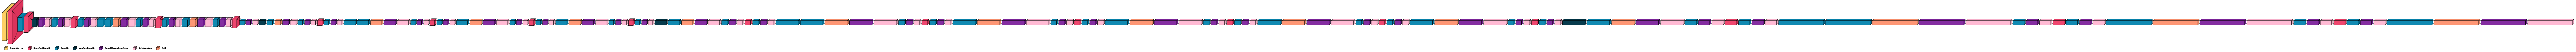

In [8]:
visualkeras.layered_view(conv_base_resnet, legend = True)

### 1.0.0. Fast feature extraction without data augmentation (ResNet50V2)
* We can now run the convolutional base over our dataset, recod its output to a NumPy array on disk, and then use this data as input to a standalone, densely connected classifier.
* This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline.
* But for the same reason, this technique won't allow us to use data augmentation.
* We will start by extracting eatures as NumPy arrays by calling the predict() method of the conv_base model on our training, validation, and testing datasets.
* This same process will be applied for the rest of pre-trained models.

But first, let's preprocess the dataset:
* Since the images already have a standard size (32 x 32 with 3 RGB color channels), there is no need to reshape them. However, the values can be normalized, and, why not, the labels can also be converted to categorical format.
* Normalizing values: we could do normalization by converting the images to float32 type and dividing them by 255.0, however, it is better to add a layer in the model that handles this in a more stramlined way. Therefore, normalization will be implemented directly withing the model.
* Transforming the labels to categorical: if we use `sparse_categorical_crossentropy` as the loss function in the model, converting the labels would not be necessary. However, since we will be using `categorical_crossentropy`, we do need to apply this conversion.

Now, before building our first models, we will first create a validation dataset for hyperparameter tuning and to evaluate the model’s performance during training, ensuring better generalization to unseen data.

In [87]:
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [10]:
print(train_images.shape)
print(test_images.shape)
print(validation_images.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


And now, we can start with the features extraction for ResNet50V2.

In [11]:
def get_features_and_labels_resnet50v2(images, labels):
    images = np.array(images)
    labels = np.array(labels)

    preprocessed_images = keras.applications.resnet_v2.preprocess_input(images)
    features = conv_base_resnet.predict(preprocessed_images)

    return features, labels

train_features, t_labels = get_features_and_labels_resnet50v2(train_images, train_labels)
val_features, v_labels = get_features_and_labels_resnet50v2(validation_images, validation_labels)
test_features, test_labels = get_features_and_labels_resnet50v2(test_images, test_labels)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 115ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step


In [12]:
print(train_features.shape, t_labels.shape)
print(val_features.shape, v_labels.shape)
print(test_features.shape, test_labels.shape)

(40000, 1, 1, 2048) (40000, 1)
(10000, 1, 1, 2048) (10000, 1)
(10000, 1, 1, 2048) (10000, 1)


In [13]:
num_classes = 20 

t_labels = to_categorical(t_labels, num_classes)
v_labels = to_categorical(v_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [14]:
print(t_labels.shape)
print(v_labels.shape)
print(test_labels.shape)

(40000, 20)
(10000, 20)
(10000, 20)


In [16]:
inputs = keras.Input(shape=(1, 1, 2048))
x = layers.Flatten()(inputs)
x = layers.Dense(768, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256,activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128,activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(20, activation="softmax")(x)

fe_resnet = keras.Model(inputs, outputs)
fe_resnet.compile(loss="categorical_crossentropy",
                     optimizer="rmsprop",
                     metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/ResNet50C_feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=20,
        restore_best_weights=True
    )
]
history_fe_resnet = fe_resnet.fit(
    train_features, t_labels,
    epochs=100,
    validation_data=(val_features, v_labels),
    callbacks=callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.1750 - loss: 2.7139 - val_accuracy: 0.2789 - val_loss: 2.3654
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.2818 - loss: 2.3638 - val_accuracy: 0.2911 - val_loss: 2.3297
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.3172 - loss: 2.2582 - val_accuracy: 0.2974 - val_loss: 2.3263
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.3409 - loss: 2.1882 - val_accuracy: 0.3043 - val_loss: 2.3672
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.3615 - loss: 2.1233 - val_accuracy: 0.3049 - val_loss: 2.3885
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.3833 - loss: 2.0671 - val_accuracy: 0.3022 - val_loss: 2.4396
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4045 - loss: 2.0080 - val_accuracy: 0.3089 - val_loss: 2.5253
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 

As we can see, it doesn't give very good results and stops early. Before these experiments, other architectures and the Adam compiler were tested, but the results weren't much better than this one. Now let's see the performance in a graph:

In [17]:
def plot(history):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "b-o", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "r--o", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "b-o", label="Training loss")
    plt.plot(epochs, val_loss, "r--o", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

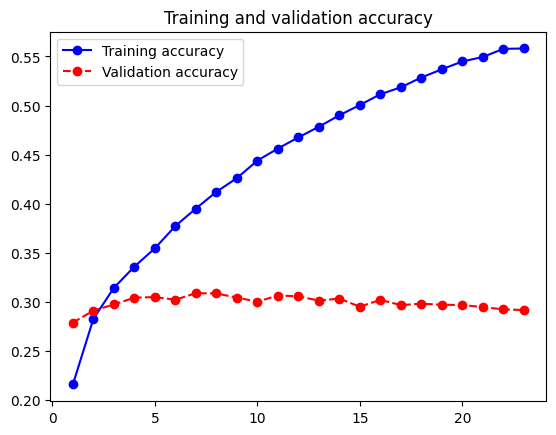

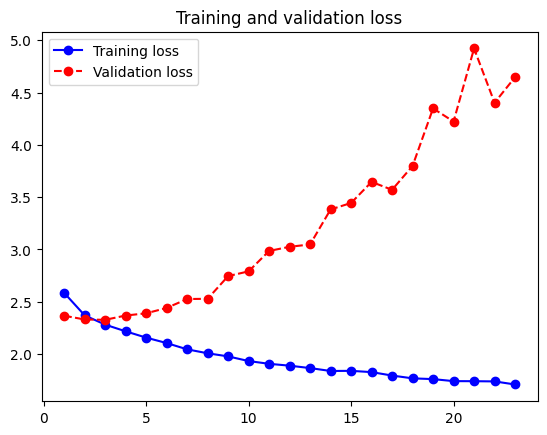

In [18]:
plot(history_fe_resnet)

### 1.0.1. Feature extraction together with data augmentation (ResNet50V2)
* Now, we are going to extend the model we have by adding Dense layers on top, and run the whole thing from end to end on the input data. This will allow us to use data augmentation, because every input image goes through the convolutional base every time it's seen by the model.
* Our first step will be to freeze the convolutional base.


In [19]:
conv_base_resnet = keras.applications.ResNet50V2(
    weights = "imagenet",
    include_top = False)

In [20]:
conv_base_resnet.trainable = False

In [21]:
conv_base_resnet.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, None, None, 3)     │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 64)    │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, None, None, 64)    │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, None, None, 64)    │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, None, None, 64)    │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, None, None, 64)    │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, None, None, 64)    │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, None, None, 64)    │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, None, None, 64)    │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

Let's now introduce the data_agumentation layer and compile the model. Then we will train it again as did before.

In [37]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)
  
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet_v2.preprocess_input(x) 
x = conv_base_resnet(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256,activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128,activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(20, activation="softmax")(x)

# da = data augmentation
da_resnet = keras.Model(inputs, outputs)
da_resnet.compile(loss="categorical_crossentropy", optimizer = keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4),
              metrics=["accuracy"])

In [29]:
num_classes = 20 
t_labels_categorical = to_categorical(train_labels, num_classes)
v_labels_categorical = to_categorical(validation_labels, num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes)

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/ResNet50V2_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=20,
        restore_best_weights=True
    )
]
history_da_resnet = da_resnet.fit(
    train_images, t_labels_categorical,
    epochs=100,
    batch_size=64,
    validation_data=(validation_images, v_labels_categorical),
    callbacks=callbacks)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 220ms/step - accuracy: 0.1484 - loss: 2.7788 - val_accuracy: 0.2629 - val_loss: 2.4139
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 215ms/step - accuracy: 0.2308 - loss: 2.5100 - val_accuracy: 0.2838 - val_loss: 2.3444
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.2463 - loss: 2.4533 - val_accuracy: 0.2941 - val_loss: 2.3147
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 216ms/step - accuracy: 0.2610 - loss: 2.4109 - val_accuracy: 0.2975 - val_loss: 2.2976
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.2650 - loss: 2.4001 - val_accuracy: 0.2992 - val_loss: 2.2704
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.2733 - loss: 2.3696 - val_accuracy: 0.3077 - val_loss: 2.2728
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 241ms/step - accuracy: 0.2757 - loss: 2.3659 - val_accuracy: 0.3115 - val_loss: 2.2630
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 

No noticeable improvement. Let's see graphically the performance.

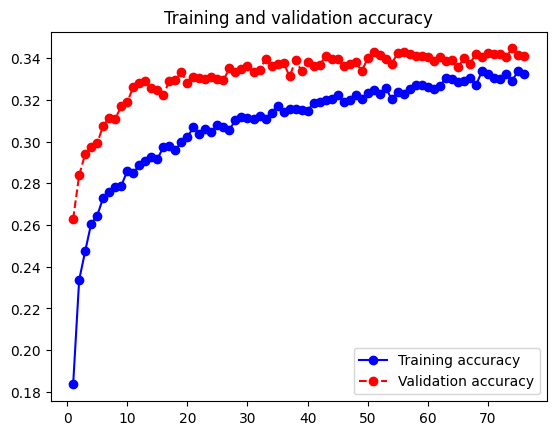

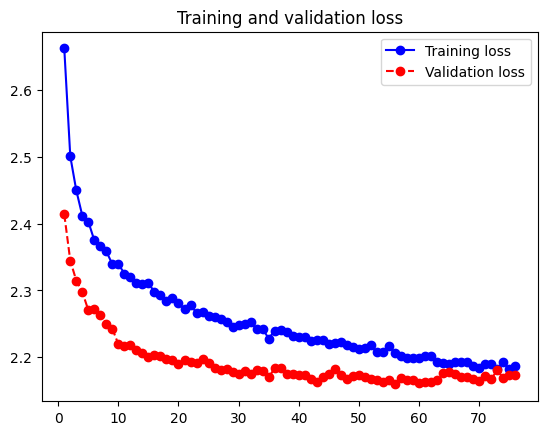

In [40]:
plot(history_da_resnet)

In [42]:
test_da_resnet_model = keras.models.load_model("models/ResNet50V2_with_augmentation.keras")
test_loss_da_resnet, test_acc_da_resnet = test_da_resnet_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc_da_resnet:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 136ms/step - accuracy: 0.3365 - loss: 2.1910
Test accuracy: 0.336


### 1.0.2. Fine-tuning (ResNet50V2)
* Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction.
* Then jointly train both these top layers and the added part (the fully connected classifier).
* The steps that we will follow are the following: add our custom network on top of an already-trained base network. Freeze the base network and train the part we added (we need to train the classifier part before fine-tuning, otherwise the error signal during training will be too large and it will destroy the features already learned in the layer we are going to fine-tune). Unfreeze some layers in the base network and finally, jointly train both those layers and the classifier added (again).

In [43]:
conv_base_resnet.trainable = True
for layer in conv_base_resnet.layers[:-20]:
    layer.trainable = False

In [44]:
# Summary of our model
conv_base_resnet.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, None, None, 3)     │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 64)    │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, None, None, 64)    │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, None, None, 64)    │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, None, None, 64)    │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, None, None, 64)    │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, None, None, 64)    │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, None, None, 64)    │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, None, None, 64)    │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, None, None, 64)    │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 7,879,680 (30.06 MB)

 Non-trainable params: 15,685,120 (59.83 MB)

As before, we are going to compile the model again and train it.

In [47]:
da_resnet.compile(loss="categorical_crossentropy",
              optimizer = keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-4),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/ResNet50V2_fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]
history_ft_resnet = da_resnet.fit(
    train_images, t_labels_categorical,
    epochs=30,
    batch_size=64,
    validation_data=(validation_images, v_labels_categorical),
    callbacks=callbacks)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 399ms/step - accuracy: 0.1881 - loss: 3.3601 - val_accuracy: 0.2669 - val_loss: 2.4267
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 233s 372ms/step - accuracy: 0.2432 - loss: 2.5090 - val_accuracy: 0.3035 - val_loss: 2.2924
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 372ms/step - accuracy: 0.2705 - loss: 2.4081 - val_accuracy: 0.3222 - val_loss: 2.2326
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 368ms/step - accuracy: 0.2807 - loss: 2.3732 - val_accuracy: 0.3274 - val_loss: 2.1951
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 233s 372ms/step - accuracy: 0.2905 - loss: 2.3352 - val_accuracy: 0.3378 - val_loss: 2.1576
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 435ms/step - accuracy: 0.2971 - loss: 2.3184 - val_accuracy: 0.3399 - val_loss: 2.1537
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 388ms/step - accuracy: 0.2986 - loss: 2.2878 - val_accuracy: 0.3472 - val_loss: 2.1233
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 233s 373ms/step - accuracy: 0.3106 -

It shows some interesting improvements in validation accuracy that will be analyzed in the results analysis section.

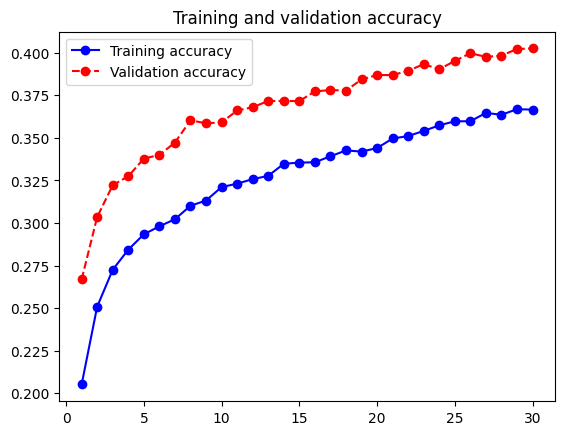

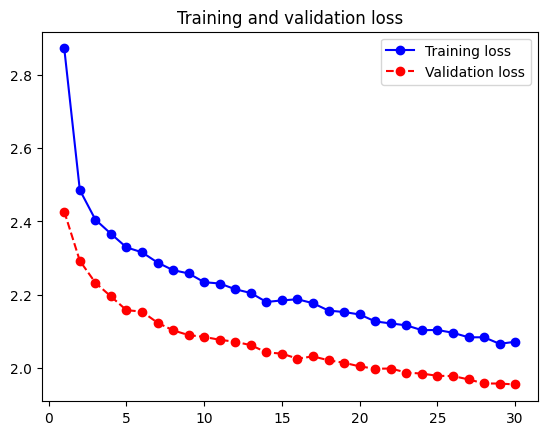

In [48]:
plot(history_ft_resnet)

In [50]:
test_ft_resnet_model = keras.models.load_model("models/ResNet50V2_fine_tuning.keras")
test_loss_ft_resnet, test_acc_ft_resnet = test_ft_resnet_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc_ft_resnet:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.3977 - loss: 1.9741
Test accuracy: 0.394


## 1.1. EfficientNetB0
* We will use the EfficientNetB0 architecture proposed by Mingxing Tan and Quoc V. Le.
* This architecture was trained with ImageNet, as ResNet50V2. So it contains, as well, 1000 different classes.
* This structure uses scaling uniforme, EfficientNetB0 is the base version but there are bigger variants as B1-B7.


In [42]:
conv_base_efficientnet = keras.applications.EfficientNetB0(
    weights = "imagenet",
    include_top = False,
    input_shape = (32, 32, 3))

conv_base_efficientnet.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 32, 32, 3)         │               0 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 32, 32, 3)         │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 32, 32, 3)         │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 33, 33, 3)         │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 16, 16, 32)        │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 16, 16, 32)        │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 16, 16, 32)        │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 16, 16, 32)        │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 16, 16, 32)        │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 16, 16, 32)        │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

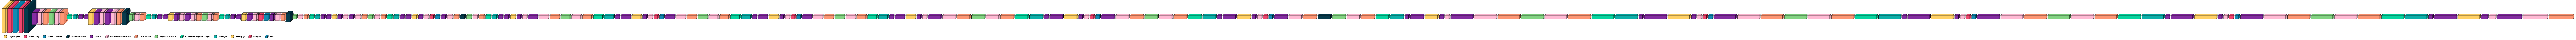

In [43]:
visualkeras.layered_view(conv_base_efficientnet, legend = True)

## 1.1.0. Fast feature extraction without data augmentation (EfficientNetB0)

In [44]:
def get_features_and_labels_efficientNetB0(images, labels):
    images = np.array(images)
    labels = np.array(labels)

    preprocessed_images = keras.applications.resnet_v2.preprocess_input(images)
    features = conv_base_efficientnet.predict(preprocessed_images)

    return features, labels

train_features, t_labels = get_features_and_labels_efficientNetB0(train_images, train_labels)
val_features, v_labels = get_features_and_labels_efficientNetB0(validation_images, validation_labels)
test_features, test_labels = get_features_and_labels_efficientNetB0(test_images, test_labels)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step


In [45]:
print(train_features.shape, t_labels.shape)
print(val_features.shape, v_labels.shape)
print(test_features.shape, test_labels.shape)

(40000, 1, 1, 1280) (40000, 1)
(10000, 1, 1, 1280) (10000, 1)
(10000, 1, 1, 1280) (10000, 20)


In [46]:
num_classes = 20 

t_labels = to_categorical(t_labels, num_classes)
v_labels = to_categorical(v_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [47]:
print(t_labels.shape)
print(v_labels.shape)
print(test_labels.shape)

(40000, 20)
(10000, 20)
(10000, 20, 20)


In [50]:
inputs = keras.Input(shape=(1, 1, 1280))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256,activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128,activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(20, activation="softmax")(x)

model_resnet = keras.Model(inputs, outputs)
model_resnet.compile(loss="categorical_crossentropy",
                     optimizer="rmsprop",
                     metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/EfficientNetB0_feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]
history = model_resnet.fit(
    train_features, t_labels,
    epochs=100,
    validation_data=(val_features, v_labels),
    callbacks=callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0510 - loss: 3.0044 - val_accuracy: 0.0509 - val_loss: 2.9962
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0509 - loss: 2.9961 - val_accuracy: 0.0478 - val_loss: 2.9962
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0512 - loss: 2.9959 - val_accuracy: 0.0482 - val_loss: 2.9959
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0483 - loss: 2.9960 - val_accuracy: 0.0482 - val_loss: 2.9961
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0498 - loss: 2.9958 - val_accuracy: 0.0460 - val_loss: 2.9960
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0496 - loss: 2.9960 - val_accuracy: 0.0460 - val_loss: 2.9962
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0480 - loss: 2.9961 - val_accuracy: 0.0460 - val_loss: 2.9961
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0497 -

This model has been tested extensively, varying architecture, optimization parameters, batch size, and different layer types, but it doesn't seem to extract features well. Therefore, experiments with this model will be discontinued and other models will be tested.

## 1.2. VGG19

* We will use the VGG19 architecture proposed by Karen Simonyan and Andrew Zisserman.  
* This architecture was trained on the ImageNet dataset, which consists of 1000 different categories.  
* VGG19 is an extended version of VGG16, featuring 19 layers (16 convolutional layers and 3 fully connected layers). It is characterized by its deep hierarchical structure, composed of small 3×3 convolutional filters and max-pooling layers, which help extract increasingly complex features at different levels of abstraction.  
* Despite its high computational cost, VGG19 is used due to its strong feature extraction capabilities and consistent performance in transfer learning tasks.


In [51]:
# Instantiating the VGG19 convolutional base
conv_base_vgg19 = keras.applications.VGG19(
    weights = "imagenet",
    include_top = False,
    input_shape = (32, 32, 3))

In [52]:
conv_base_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

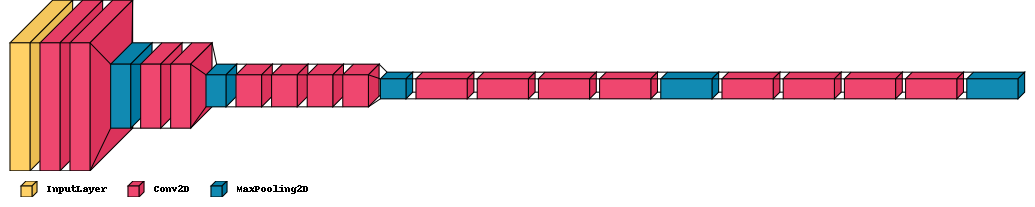

In [53]:
visualkeras.layered_view(conv_base_vgg19, legend = True)

### 1.2.0. Fast feature extraction without data augmentation (VGG19)
As in the previous models, we will start with feature extraction with this model.

In [54]:
from keras.applications.vgg19 import preprocess_input
def get_features_and_labels_vgg19(images, labels):
    images = np.array(images)
    labels = np.array(labels)

    preprocessed_images = keras.applications.vgg19.preprocess_input(images)
    features = conv_base_vgg19.predict(preprocessed_images)

    return features, labels

train_features, t_labels = get_features_and_labels_vgg19(train_images, train_labels)
val_features, v_labels = get_features_and_labels_vgg19(validation_images, validation_labels)
test_features, test_labels = get_features_and_labels_vgg19(test_images, test_labels)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 278s 222ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 220ms/step


In [89]:
num_classes = 20 

t_labels = to_categorical(t_labels, num_classes)
v_labels = to_categorical(v_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [58]:
print(train_features.shape, t_labels.shape)
print(val_features.shape, v_labels.shape)
print(test_features.shape, test_labels.shape)

(40000, 1, 1, 512) (40000, 20)
(10000, 1, 1, 512) (10000, 20)
(10000, 1, 1, 512) (10000, 20, 20)


In [63]:
inputs = keras.Input(shape=(1, 1, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)  
x = layers.Dense(256, activation="relu")(x)  
x = layers.Dropout(0.4)(x)  
outputs = layers.Dense(20, activation="softmax")(x)

fe_vgg19 = keras.Model(inputs, outputs)
fe_vgg19.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.AdamW(learning_rate=0.0001),
                     metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/VGG19_feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]
history_fe_vgg19 = fe_vgg19.fit(
    train_features, t_labels,
    epochs=100,
    validation_data=(val_features, v_labels),
    callbacks=callbacks)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1050 - loss: 13.9052 - val_accuracy: 0.1869 - val_loss: 2.7668
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1537 - loss: 3.2052 - val_accuracy: 0.2032 - val_loss: 2.7390
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1919 - loss: 2.7696 - val_accuracy: 0.2700 - val_loss: 2.5149
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2401 - loss: 2.5759 - val_accuracy: 0.3360 - val_loss: 2.2452
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2932 - loss: 2.3909 - val_accuracy: 0.3712 - val_loss: 2.0929
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3268 - loss: 2.2439 - val_accuracy: 0.4039 - val_loss: 2.0025
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3442 - loss: 2.1494 - val_accuracy: 0.4212 - val_loss: 1.9124
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3670 - los

Let's see now the performance of this model.

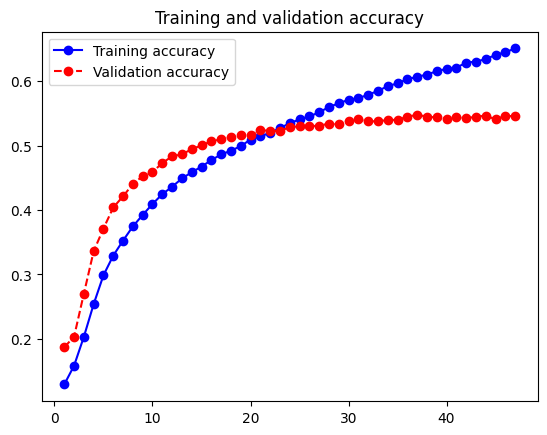

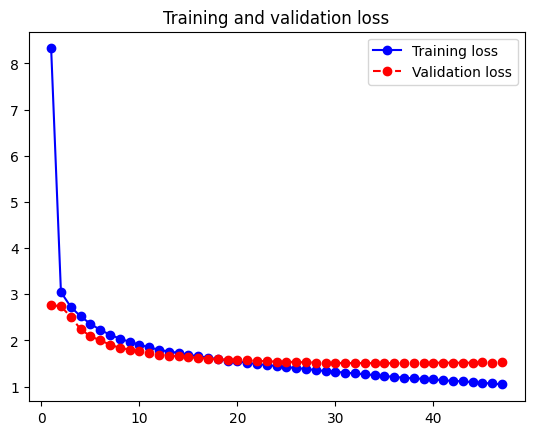

In [64]:
plot(history_fe_vgg19)

### 1.2.1. Feature extraction together with data augmentation (VGG19)


Now, we will proceed with the same feature extraction but this time with data augmentation.

In [65]:
conv_base_vgg19 = keras.applications.VGG19(
    weights = "imagenet",
    include_top = False)

In [66]:
conv_base_vgg19.trainable = False

In [67]:
conv_base_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [78]:
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg19.preprocess_input(x) 
x = conv_base_vgg19(x)
x = layers.Flatten()(x)
x = layers.Dense(256,activation="relu")(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(20, activation="softmax")(x)
da_vgg19 = keras.Model(inputs, outputs)
da_vgg19.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.AdamW(learning_rate=0.0001),
                     metrics=["accuracy"])

In [79]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/VGG19_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]
history_da_vgg19 = da_vgg19.fit(
    train_images, t_labels_categorical,
    epochs=30,
    validation_data=(validation_images, v_labels_categorical),
    callbacks=callbacks)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 434s 346ms/step - accuracy: 0.1287 - loss: 16.0998 - val_accuracy: 0.3003 - val_loss: 3.5561
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 434s 347ms/step - accuracy: 0.2103 - loss: 3.7220 - val_accuracy: 0.3018 - val_loss: 2.5277
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 436s 349ms/step - accuracy: 0.2304 - loss: 2.7379 - val_accuracy: 0.3352 - val_loss: 2.3017
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 440s 352ms/step - accuracy: 0.2620 - loss: 2.5431 - val_accuracy: 0.3700 - val_loss: 2.1627
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 435s 348ms/step - accuracy: 0.2904 - loss: 2.4112 - val_accuracy: 0.3871 - val_loss: 2.0562
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 426s 341ms/step - accuracy: 0.3194 - loss: 2.2740 - val_accuracy: 0.4034 - val_loss: 1.9808
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 438s 350ms/step - accuracy: 0.3317 - loss: 2.2174 - val_accuracy: 0.4152 - val_loss: 1.9337
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 433s 346ms/step - a

Let's plot the performance of the model.

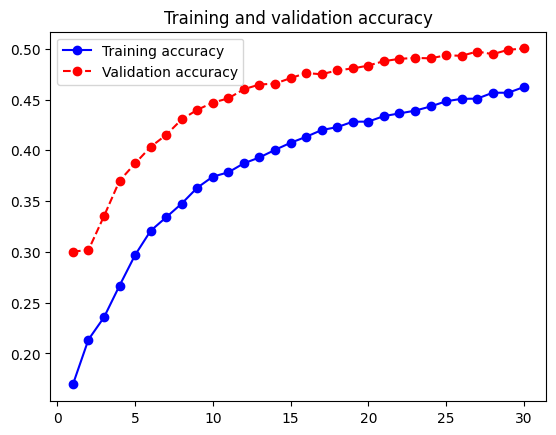

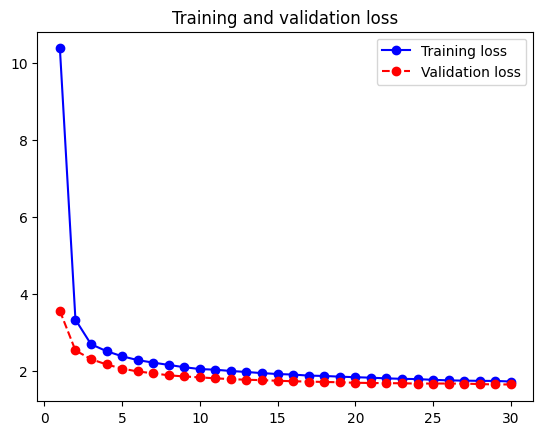

In [80]:
plot(history_da_vgg19)

In [90]:
test_da_vgg19_model = keras.models.load_model("models/VGG19_with_augmentation.keras")
test_loss_da_vgg19, test_acc_da_vgg19 = test_da_vgg19_model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc_da_vgg19:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 248ms/step - accuracy: 0.5022 - loss: 1.6624
Test accuracy: 0.497


### 1.2.2. Fine-tuning (VGG19)
In this case, we'll freeze the first 14 layers of the model to perform fine tuning. We consider this number to be one of the "optimal" after several experiments.

In [91]:
conv_base_vgg19.trainable = True
for layer in conv_base_vgg19.layers[:14]:
    layer.trainable = False

In [92]:
conv_base_vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 14,158,848 (54.01 MB)

 Non-trainable params: 5,865,536 (22.38 MB)

In [94]:
da_vgg19.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.AdamW(learning_rate=0.0001),
                     metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="models/VGG19_fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"),
    EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )
]
history_ft_vgg19 = da_vgg19.fit(
    train_images, t_labels_categorical,
    epochs=30,
    batch_size=64,
    validation_data=(validation_images, v_labels_categorical),
    callbacks=callbacks)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 727s 1s/step - accuracy: 0.3734 - loss: 2.0249 - val_accuracy: 0.5136 - val_loss: 1.5722
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 655s 1s/step - accuracy: 0.4867 - loss: 1.6698 - val_accuracy: 0.5650 - val_loss: 1.4102
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 657s 1s/step - accuracy: 0.5397 - loss: 1.5043 - val_accuracy: 0.5833 - val_loss: 1.3936
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 661s 1s/step - accuracy: 0.5697 - loss: 1.4094 - val_accuracy: 0.5818 - val_loss: 1.4221
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.5936 - loss: 1.3178 - val_accuracy: 0.6040 - val_loss: 1.3068
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.6090 - loss: 1.2541 - val_accuracy: 0.6218 - val_loss: 1.2400
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.6268 - loss: 1.1970 - val_accuracy: 0.6101 - val_loss: 1.3412
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 662s 1s/step - accuracy: 0.6534 - loss: 1.1128 - val_accu

Let's see the performance of the model.

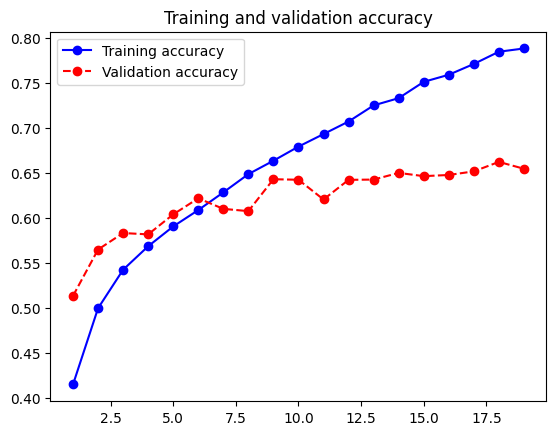

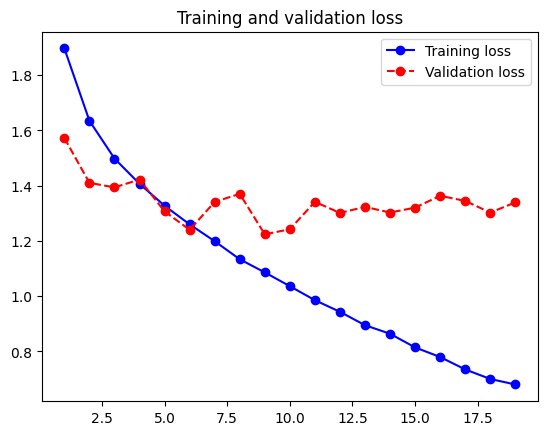

In [96]:
plot(history_ft_vgg19)

In [102]:
# We choose the da_vgg19 model as was the last modified in order to apply fine tuning
test_ft_vgg19_model = keras.models.load_model("models/VGG19_fine_tuning.keras")
test_loss_ft_vgg19, test_acc_ft_vgg19 = test_ft_vgg19_model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc_ft_vgg19:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 251ms/step - accuracy: 0.6431 - loss: 1.2203
Test accuracy: 0.639


## 1.3. MobileNetV2
* We will use the MobileNetV2 architecture proposed by Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov and Liang-Chieh Chen.
* This architecture was also trained with ImageNet, so it has 1000 different classes.
* It has been developed to mobile applications and embedded systems. It uses inverted residual blocks and linear bottlenecks for efficiency.
* It is faster and lighter than RestNet.

**This training is on notebook "delivery2_part2.ipynb**.

# 2. Analysis of Pretrained Models for CIFAR-100 Superclasses Classification

## 2.0. Summary
The utilization of pretrained models is a novel approach that we have explored in this study. Our primary objective was to evaluate different architectures to determine which were most suitable for addressing our specific classification task: training on the CIFAR-100 dataset, but grouping the classes into their respective superclasses.  

After a preliminary evaluation, we selected the following architectures for further experimentation:  
- **ResNet50V2**  
- **EfficientNetB0** (which we discontinued due to poor performance in feature extraction)  
- **VGG19**  
- **MobileNetV2**  

These architectures were chosen based on their balance between performance, parameter efficiency, and adaptability to CIFAR-100.  
- **ResNet50V2**: Chosen for its deep residual connections that help mitigate the vanishing gradient problem in deep networks.  
- **EfficientNetB0**: Initially considered due to its computational efficiency and high accuracy in various tasks, but later discarded due to subpar performance in our experiments.  
- **VGG19**: Selected for its simple yet effective hierarchical convolutional structure, which has demonstrated success in object classification tasks.  
- **MobileNetV2**: Considered due to its depthwise separable convolutions, which make it efficient for training with limited computational resources.  

For each pretrained model, we conducted **feature extraction without data augmentation, feature extraction with data augmentation, and fine-tuning** to determine the best strategy for improving performance.

## 2.1. Experiments and Findings

### **ResNet50V2**
In the case of **ResNet50V2**, we observed that applying data augmentation during feature extraction did not improve performance. In fact, the validation accuracy (val_accuracy) was higher when data augmentation was not applied.  

We made the following adjustments:  
- **Optimizer**: Switched from **RMSprop** to **AdamW** with:  
  - **Learning rate** = 10^{-3}
  - **Weight decay** = 10^{-4}### **EfficientNetB0**
- **Model structure**: No modifications were made to the internal architecture.  

Training these models was computationally expensive, requiring significant execution time.  

For fine-tuning, we unfroze the last 20 layers of ResNet50V2 while keeping the previous optimizations unchanged. The decision to unfreeze these layers was made to allow the model to adjust its high-level feature representations to better fit the CIFAR-100 superclass dataset. This approach slightly improved validation accuracy, increasing from approximately 0.34 to 0.40. This improvement, albeit moderate, demonstrates that fine-tuning can be beneficial even when data augmentation does not yield positive effects.

### **EfficientNetB0**
We initially tested feature extraction on **EfficientNetB0**, but the results were significantly poor. Given its performance, we discontinued further experiments with this model and shifted focus to the other architectures.

### **VGG19**
In the case of **VGG19**, feature extraction without data augmentation resulted in a high validation accuracy of approximately 0.55. However, when we introduced data augmentation, the validation accuracy dropped to around 0.50. Despite this decrease, we decided to proceed with fine-tuning.  

For fine-tuning, we froze the first 14 layers of VGG19 and trained the remaining layers. Surprisingly, this led to substantial improvements, achieving a maximum validation accuracy of approximately 0.65. Furthermore, training accuracy reached nearly 0.80, while both training loss and validation loss remained relatively low. This suggests that fine-tuning VGG19 was highly effective for this dataset.

### MobileNet
In the case of MobileNet (trained in Part 2), we can observe that without data augmentation, the model achieves a validation accuracy of approximately 0.21, which is quite poor. However, when data augmentation is applied, there is a notable improvement, reaching a validation accuracy of around 0.66.

Moreover, when fine-tuning is performed, the model demonstrates better generalization, achieving a validation accuracy of 0.8 and maintaining relatively low loss values. Overall, MobileNet delivers highly satisfactory results.

## 2.2. Results and Analysis
The table below summarizes the test set results for each model:

| Model      | Test Loss | Test Accuracy  |
|------------|-----------|----------------|
| DA ResNet  | 2.1849    | 0.3359 (33.6%) |
| FT ResNet  | 1.9720    | 0.3942 (39.4%) |
| DA VGG19   | 1.6548    | 0.4966 (49.7%) |
| FT VGG19   | 1.2321    | 0.6387 (63.9%) |
| DA MNetV2  | 1.1380    | 0.6612 (66.1%) |
| FT MNetV2  | 0.5898    | 0.8221 (82.2%) |


### **Interpretation of Results**
- **Data Augmentation (DA)** refers to training with transformations such as rotation, flipping, and scaling.  
- **Fine-Tuning (FT)** involves unfreezing part of the pretrained network and training it on the new dataset.  

Observing the results:
1. **ResNet50V2**:
   - Data augmentation (DA ResNet) performed poorly, with the highest test loss (2.18) and lowest accuracy (33.6%).
   - Fine-tuning (FT ResNet) improved performance, reducing the test loss (1.97) and increasing test accuracy to 39.4%.
   - This suggests that ResNet50V2 does not benefit from data augmentation in this scenario, but fine-tuning does contribute to better performance.

2. **VGG19**:
   - Feature extraction with data augmentation (DA VGG19) resulted in a loss of 1.65 and accuracy of 49.7%, already outperforming ResNet50V2.
   - Fine-tuning (FT VGG19) achieved the best results overall, with the lowest test loss (1.23) and highest accuracy (63.9%).
   - This highlights that VGG19 benefits significantly from fine-tuning, making it the best-performing model in our experiments.

3. **MobileNet**
    - Data augmentation (DA MobileNet) performed fairly good, with the highest test loss (1.14) and accuracy (66.3%).
    - Fine-tuning is the best strategy, achieving the highest accuracy near (80%) and lowest loss (near 0.5) and it could even improve if we have more time to training it. 
    - This suggest that DataAugmentation improves performance but is still inferior to Fine Tuning. 


4. **Key Observations**
- **Fine-tuning consistently improves performance** across models, with MobileNetV2 achieving the most significant gains follow for VGG19.
- **Data augmentation does not always improve feature extraction performance**. In both ResNet50V2 and VGG19, validation accuracy decreased when augmentation was applied.
- **MobileNetV2 demonstrated the highest test accuracy around 80%**, confirming that when this model has fine tuning it is well-suited for CIFAR-100 superclass classification.
- **ResNet50V2 showed moderate improvements with fine-tuning**, but its performance was inferior to VGG19.
- **EfficientNetB0 was not effective** in our experiments, leading to its exclusion from further analysis.

In [6]:
#values from the other file and this to unite them
test_loss_da_mnetv2=1.1380
test_acc_da_mnetv2=0.6612
test_loss_fn_mnetv2=0.5994 #aprox
test_acc_fn_mnetv2=0.8163 #aprox
test_loss_da_resnet1=2.1910
test_loss_ft_resnet1=1.9741
test_loss_da_vgg191=1.6624
test_loss_ft_vgg191=1.2203
test_acc_da_resnet1=0.3365
test_acc_ft_resnet1=0.3977
test_acc_da_vgg191=0.5022
test_acc_ft_vgg191=0.6431

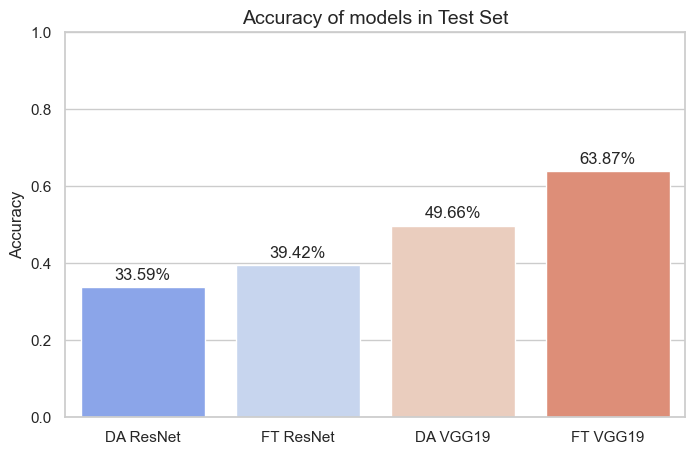

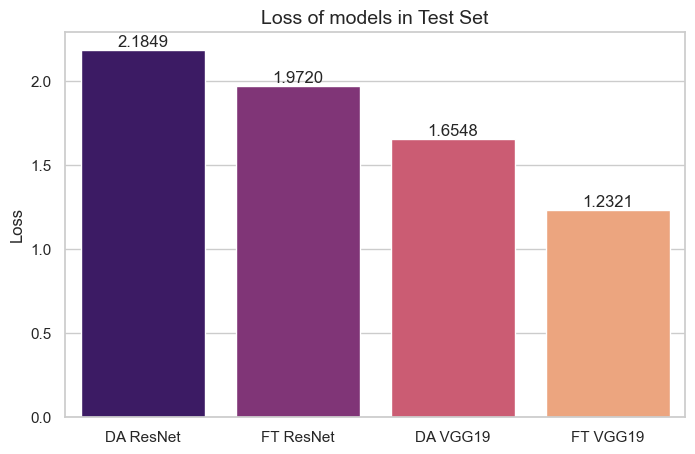

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ["DA ResNet", "FT ResNet", "DA VGG19", "FT VGG19"]
test_losses = [test_loss_da_resnet, test_loss_ft_resnet, test_loss_da_vgg19, test_loss_ft_vgg19]
test_accuracies = [test_acc_da_resnet, test_acc_ft_resnet, test_acc_da_vgg19, test_acc_ft_vgg19]

sns.set_theme(style="whitegrid")

# Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=test_accuracies, palette="coolwarm")
plt.title("Accuracy of models in Test Set", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha="center", fontsize=12)
plt.show()

# Loss
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=test_losses, palette="magma")
plt.title("Loss of models in Test Set", fontsize=14)
plt.ylabel("Loss")
for i, loss in enumerate(test_losses):
    plt.text(i, loss + 0.02, f"{loss:.4f}", ha="center", fontsize=12)
plt.show()

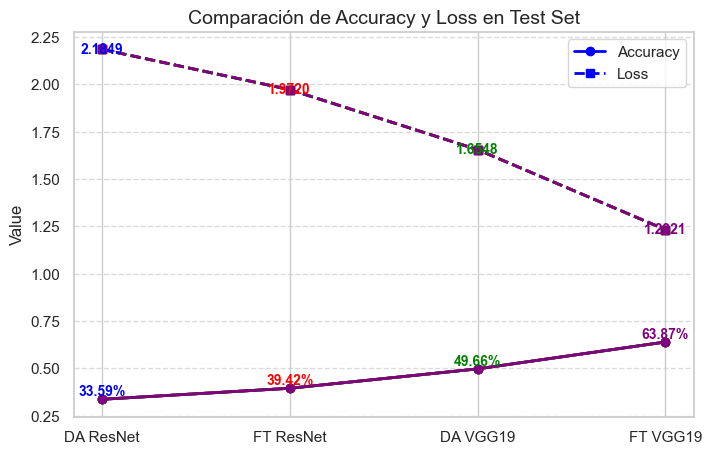

In [107]:
colors = ["blue", "red", "green", "purple"]
plt.figure(figsize=(8, 5))

for i in range(len(models)):
    plt.plot(models, test_accuracies, color=colors[i], linestyle="-", marker="o", linewidth=2, label="Accuracy" if i == 0 else "")
    plt.plot(models, test_losses, color=colors[i], linestyle="--", marker="s", linewidth=2, label="Loss" if i == 0 else "")

plt.ylabel("Value")
plt.title("Comparison of Accuracy and Loss in Test Set", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, (acc, loss) in enumerate(zip(test_accuracies, test_losses)):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha="center", fontsize=10, fontweight="bold", color=colors[i])
    plt.text(i, loss - 0.02, f"{loss:.4f}", ha="center", fontsize=10, fontweight="bold", color=colors[i])

plt.show()

Includying part 2 mobilenetv2 in graphs

C:\Users\paulabiderman\AppData\Local\Temp\ipykernel_5300\2685543693.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models1, y=test_accuracies1, palette="coolwarm")


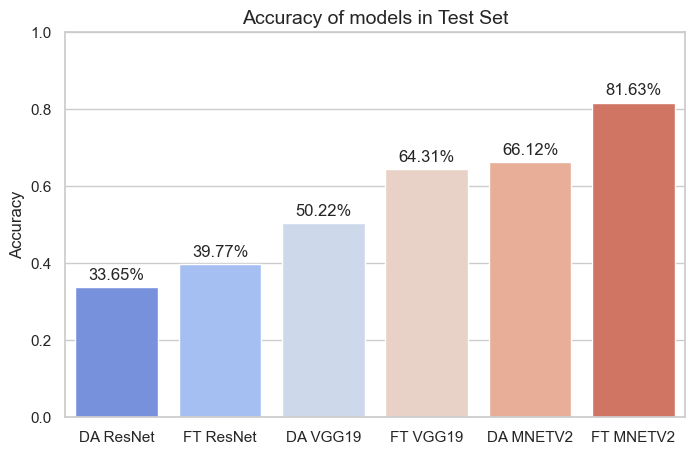

C:\Users\paulabiderman\AppData\Local\Temp\ipykernel_5300\2685543693.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models1, y=test_losses1, palette="magma")


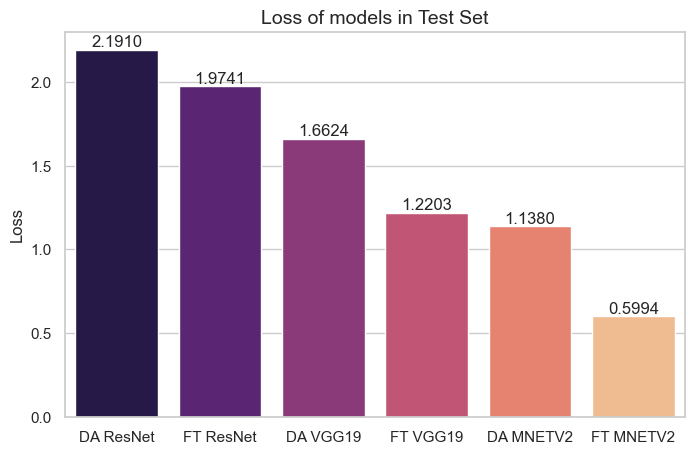

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models1 = ["DA ResNet", "FT ResNet", "DA VGG19", "FT VGG19", "DA MNETV2", "FT MNETV2"]
test_losses1 = [test_loss_da_resnet1, test_loss_ft_resnet1, test_loss_da_vgg191, test_loss_ft_vgg191, test_loss_da_mnetv2, test_loss_fn_mnetv2]
test_accuracies1 = [test_acc_da_resnet1, test_acc_ft_resnet1, test_acc_da_vgg191, test_acc_ft_vgg191, test_acc_da_mnetv2, test_acc_fn_mnetv2]

sns.set_theme(style="whitegrid")

# Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=models1, y=test_accuracies1, palette="coolwarm")
plt.title("Accuracy of models in Test Set", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, acc in enumerate(test_accuracies1):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha="center", fontsize=12)
plt.show()

# Loss
plt.figure(figsize=(8, 5))
sns.barplot(x=models1, y=test_losses1, palette="magma")
plt.title("Loss of models in Test Set", fontsize=14)
plt.ylabel("Loss")
for i, loss in enumerate(test_losses1):
    plt.text(i, loss + 0.02, f"{loss:.4f}", ha="center", fontsize=12)
plt.show()

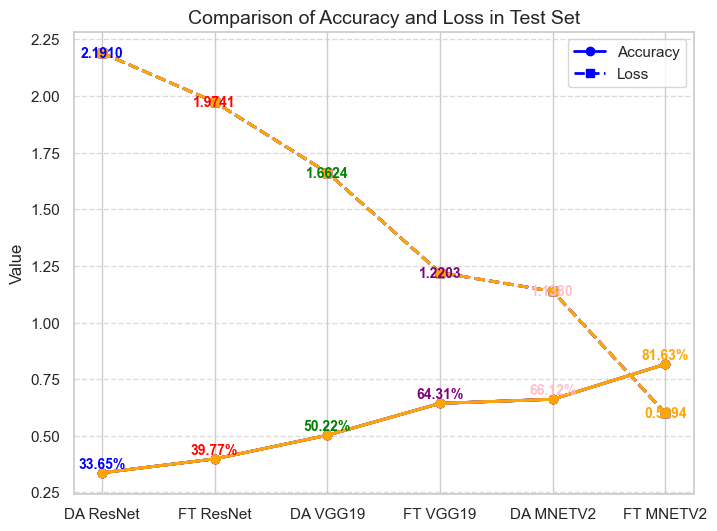

In [17]:
colors1 = ["blue", "red", "green", "purple","pink","orange"]
plt.figure(figsize=(8, 6))

for i in range(len(models1)):
    plt.plot(models1, test_accuracies1, color=colors1[i], linestyle="-", marker="o", linewidth=2, label="Accuracy" if i == 0 else "")
    plt.plot(models1, test_losses1, color=colors1[i], linestyle="--", marker="s", linewidth=2, label="Loss" if i == 0 else "")

plt.ylabel("Value")
plt.title("Comparison of Accuracy and Loss in Test Set", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, (acc, loss) in enumerate(zip(test_accuracies1, test_losses1)):
    plt.text(i, acc + 0.02, f"{acc:.2%}", ha="center", fontsize=10, fontweight="bold", color=colors1[i])
    plt.text(i, loss - 0.02, f"{loss:.4f}", ha="center", fontsize=10, fontweight="bold", color=colors1[i])

plt.show()

## 2.3. Conclusion
This study explored the performance of pretrained models on CIFAR-100 using superclasses. The results indicate that MobileNetV2 with fine-tuning is the most effective approach, achieving the highest accuracy near 80% and the lowest loss (0.59) and it is follow for VGG19 with fine tuning too that achieve (63.9%) and the lowest loss (1.23).  

Although ResNet50V2 showed improvements with fine-tuning, it did not reach the same level of performance as VGG19. EfficientNetB0 was excluded due to poor feature extraction results.  

These findings emphasize the importance of model selection and fine-tuning strategies when working with pretrained architectures on new classification tasks.